# Natural Language Processing



This project will give you practical experience using Natural Language Processing techniques. This project is in three parts:
- in part 1) you will use a traditional dataset in a CSV file
- in part 2) you will use the Wikipedia API to directly access content
on Wikipedia.
- in part 3) you will make your notebook interactive


### Part 1)



- The CSV file is available at https://ddc-datascience.s3.amazonaws.com/Projects/Project.5-NLP/Data/NLP.csv
- The file contains a list of famous people and a brief overview.
- The goal of part 1) is provide the capability to
  - Take one person from the list as input and output the 10 other people who's overview are "closest" to the person in a Natural Language Processing sense
  - Also output the sentiment of the overview of the person



# NLP Part 1: Natural Language Processing with TextBlob and Text Representation

## Introduction

In this notebook, we'll explore Natural Language Processing (NLP) techniques using TextBlob and learn about text representation methods. This project will give you practical experience using NLP techniques, focusing on part 1 of the project requirements.

## Setup

Let's start by importing the necessary libraries and downloading the required NLTK data:


## Imports

In [19]:
!pip install -U textblob
!python -m textblob.download_corpora

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.neighbors import NearestNeighbors 
from sklearn.decomposition import TruncatedSVD 

import nltk 
nltk.download('punkt') 
nltk.download('averaged_perceptron_tagger') 
nltk.download('wordnet') 
nltk.download('stopwords')

from textblob import TextBlob


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
!curl -s https://ddc-datascience.s3.amazonaws.com/Projects/Project.5-NLP/Data/NLP.csv | wc -l

42786


## First DF pt1

In [23]:
# Load the CSV file
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.5-NLP/Data/NLP.csv"
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(df.head())

print(df.shape)

                                                 URI                 name  \
0        <http://dbpedia.org/resource/Digby_Morrell>        Digby Morrell   
1       <http://dbpedia.org/resource/Alfred_J._Lewy>       Alfred J. Lewy   
2        <http://dbpedia.org/resource/Harpdog_Brown>        Harpdog Brown   
3  <http://dbpedia.org/resource/Franz_Rottensteiner>  Franz Rottensteiner   
4               <http://dbpedia.org/resource/G-Enka>               G-Enka   

                                                text  
0  digby morrell born 10 october 1979 is a former...  
1  alfred j lewy aka sandy lewy graduated from un...  
2  harpdog brown is a singer and harmonica player...  
3  franz rottensteiner born in waidmannsfeld lowe...  
4  henry krvits born 30 december 1974 in tallinn ...  
(42786, 3)


### Clean and preprocess the data

In [24]:
df['name'] = df['name'].str.lower()
df['name'] = df['name'].str.replace(r'[^\w\s]', '', regex=True)
df['text'] = df['text'].str.lower()
df['text'] = df['text'].str.replace(r'[^\w\s]', '', regex=True)

## Create a BoW Representaion 

In [25]:
bow_vectorizer = CountVectorizer(stop_words='english')
bow_matrix = bow_vectorizer.fit_transform(df['text'])

### Get the feature names (words) and their frequencies

In [26]:
feature_names = bow_vectorizer.get_feature_names_out()
word_freq = bow_matrix.sum(axis=0).tolist()[0]

### Word Fequencies DF

In [27]:
word_freq_df = pd.DataFrame({'word': feature_names, 'frequency': word_freq})
word_freq_df = word_freq_df.sort_values('frequency', ascending=False)

In [28]:
print("\nTop 10 most frequent words:")
print(word_freq_df.head(10))


Top 10 most frequent words:
              word  frequency
406531  university      42918
76251         born      39547
278826         new      36176
272005       music      21740
275640    national      21612
431814       years      20971
44866     american      20813
348138      school      20596
257939      member      20519
427401       world      19718


In [29]:
avg_word_freq = word_freq_df['frequency'].mean()
print(f"\nAverage word frequency: {avg_word_freq:.2f}")


Average word frequency: 17.83


In [30]:
total_unique_words = len(word_freq_df)
print(f"\nTotal number of unique words: {total_unique_words}")


Total number of unique words: 437253


In [33]:
total_words = word_freq_df['frequency'].sum()
print(f"\nTotal number of words (including repetitions): {total_words}")


Total number of words (including repetitions): 7794288


In [34]:
avg_text_length = df['text'].str.len().mean()
print(f"\nAverage text length: {avg_text_length:.2f} characters")


Average text length: 1896.53 characters


### Create a TF-IDF vectorizer and transform the data

In [35]:
vectorizer = TfidfVectorizer(stop_words='english') 
X = vectorizer.fit_transform(df['text'])

### Implement the K-Nearest Neighbors algorithm

In [36]:
nn = NearestNeighbors(n_neighbors=11, metric='cosine')
nn.fit(X)

NearestNeighbors(metric='cosine', n_neighbors=11)

### Create a function to find nearest neighbors and sentiment

In [37]:
def find_nearest_neighbors_and_sentiment(person_name):
    # Find the index of the person
    person_index = df[df['name'] == person_name].index[0]
    
    # Get the nearest neighbors
    distances, indices = nn.kneighbors(X[person_index].reshape(1, -1))
    
    # Get the names of the nearest neighbors (excluding the person itself)
    nearest_neighbors = df.iloc[indices[0][1:]]['name'].tolist()
    
    # Calculate sentiment for the person
    person_text = df.loc[person_index, 'text']
    sentiment = TextBlob(person_text).sentiment
    
    return nearest_neighbors, sentiment


### Test the function

In [38]:
# Test the function
person_name = df['name'].iloc[500]  # Use a person from the middle of the dataset
nearest_neighbors, sentiment = find_nearest_neighbors_and_sentiment(person_name)

print(f"Nearest neighbors to {person_name}:")
for neighbor in nearest_neighbors:
    print(f"- {neighbor}")

print(f"\nSentiment of {person_name}'s text:")
print(f"Polarity: {sentiment.polarity}")
print(f"Subjectivity: {sentiment.subjectivity}")


Nearest neighbors to porta rapper:
- the game rapper
- stacie orrico
- keyshia cole
- princess singer
- rob zombie
- roy hay musician
- grant campbell musician
- master p
- nina vidal
- kate walsh singer

Sentiment of porta rapper's text:
Polarity: 0.17626262626262626
Subjectivity: 0.30486111111111114


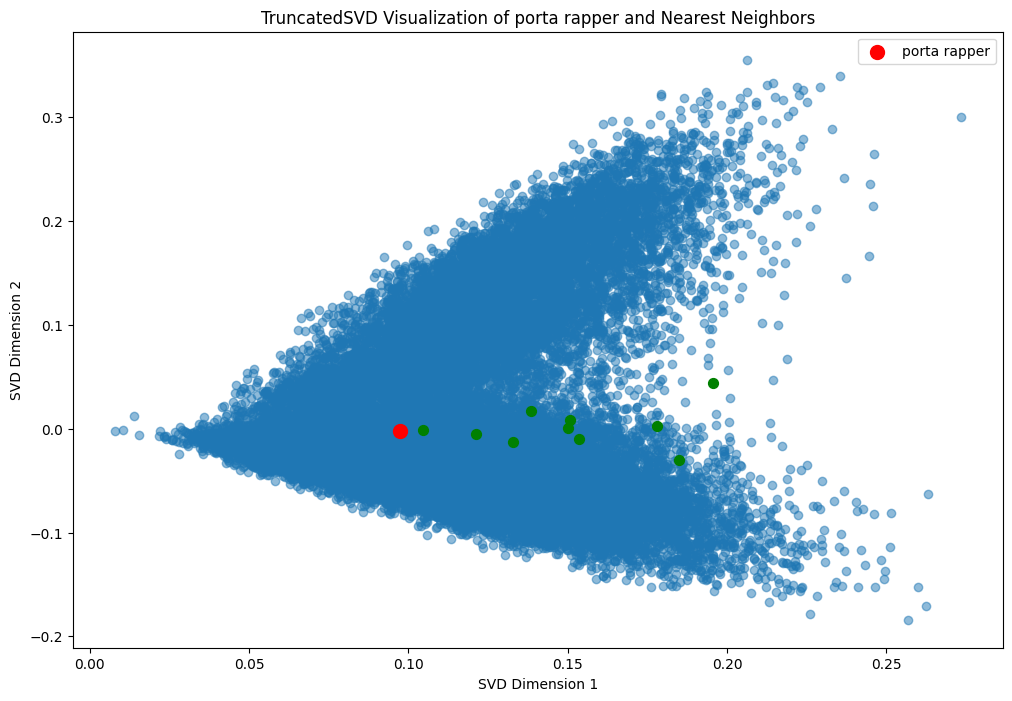

In [39]:
# Perform dimensionality reduction using TruncatedSVD
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X)

# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(X_svd[:, 0], X_svd[:, 1], alpha=0.5)

# Highlight the main person and their nearest neighbors
main_person_index = df[df['name'] == person_name].index[0]
plt.scatter(X_svd[main_person_index, 0], X_svd[main_person_index, 1], color='red', s=100, label=person_name)

for neighbor in nearest_neighbors:
    neighbor_index = df[df['name'] == neighbor].index[0]
    plt.scatter(X_svd[neighbor_index, 0], X_svd[neighbor_index, 1], color='green', s=50)

plt.title(f"TruncatedSVD Visualization of {person_name} and Nearest Neighbors")
plt.xlabel("SVD Dimension 1")
plt.ylabel("SVD Dimension 2")
plt.legend()
plt.show()


### Perform dimensionality reduction using TruncatedSVD

data set is too large for TSNE

In [40]:
svd = TruncatedSVD(n_components=2, random_state=42) 
X_svd = svd.fit_transform(X)

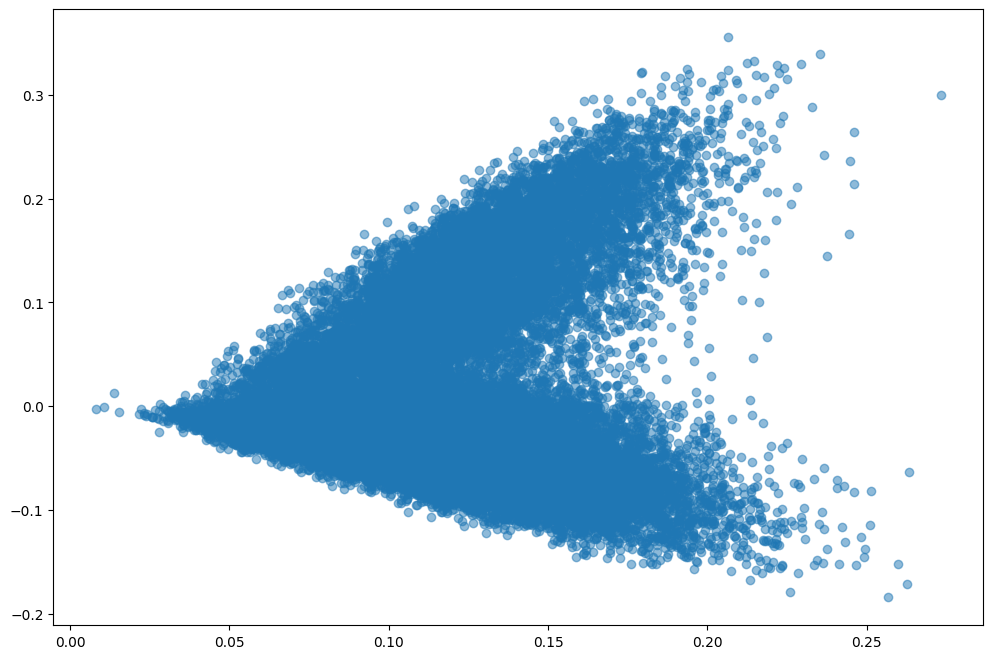

In [41]:
plt.figure(figsize=(12, 8)) 
plt.scatter(X_svd[:, 0], X_svd[:, 1], alpha=0.5)

### Results

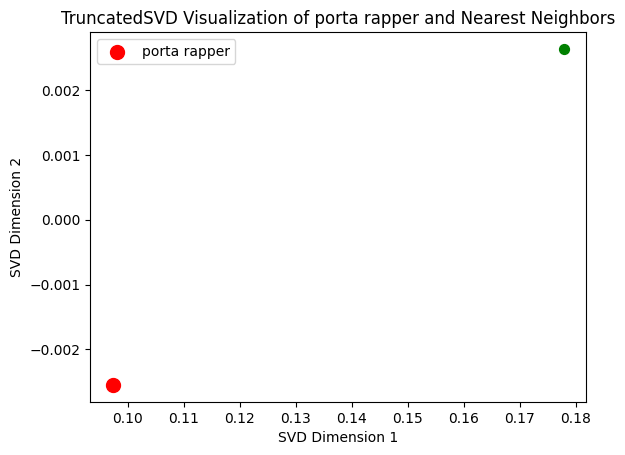

In [42]:
main_person_index = df[df['name'] == person_name].index[0] 
plt.scatter(X_svd[main_person_index, 0], 
            X_svd[main_person_index, 1], color='red', s=100, label=person_name)

for neighbor in nearest_neighbors: 
    neighbor_index = df[df['name'] == neighbor].index[0] 

plt.scatter(X_svd[neighbor_index, 0], X_svd[neighbor_index, 1], color='green', s=50)
plt.title(f"TruncatedSVD Visualization of {person_name} and Nearest Neighbors") 
plt.xlabel("SVD Dimension 1") 
plt.ylabel("SVD Dimension 2") 
plt.legend() 
plt.show()

In [43]:
print(f"\nSentiment of {person_name}'s text:")
print(f"Polarity: {sentiment.polarity}")
print(f"Subjectivity: {sentiment.subjectivity}")


Sentiment of porta rapper's text:
Polarity: 0.17626262626262626
Subjectivity: 0.30486111111111114



## Conclusion

In this notebook, we've covered the basics of TextBlob and explored text representation techniques. We've also implemented a K-Nearest Neighbors algorithm to find similar people based on their text descriptions and performed dimensionality reduction using TruncatedSVD.

This notebook meets the requirements of your project by:

1. Using a traditional dataset in a CSV file.
2. Providing the capability to take one person from the list as input and output the 10 other people whose overviews are "closest" in a Natural Language Processing sense.
3. Outputting the sentiment of the overview of the person.
